# Extracting Neuraly Relevant Information from the Shape of the Hemodynamic Response
## Note on the construction of this document
This documentation was constructed retrospectively to accompany manuscrpit publication (thesis).
It initially aimed to be a walk-through of the three neuroimaging data sets acquired during my PhD. It however ended-up focusing on the main dataset used in my thesis.
## Abstract
## Context
## Working Model and Hypothesis

## Experimental Approach and Data Acquisition
### Stimuli
### Functional MRI Paradigm
In each 
Stimuli were presented at one of two orthogonal orientations (+/- 45 degrees) in alternating 6-sec ON and 6-sec OFF blocs. This produced sinusoidal BOLD signal variations in V1 cortex.Stimuli were presented at one of two orthogonal orientations (+/- 45 degrees) in alternating 6-sec ON and 6-sec OFF blocs. This produced sinusoidal BOLD signal variations in V1 cortex.

Please get the data from the repo if not done already
data repo: /Users/sebastienproulx/OneDrive - McGill University/dataBig
IN: anatomical V1 roi (C-derived/DecodingHR/anat/z)
IN: preprocessed functionals (C-derived/DecodingHR/fun/x)
IN: stimulus timing (B-clean/DecodingHR/stim/160118_cyclicStim/data)
F(IN)=OUT: 2-df sinusoidal fit to single voxel time series
OUT: fit params and stats + HRF estimates (C-derived/DecodingHR/fun/y)
Not actually running because way too long
/Users/sebastienproulx/OneDrive - McGill University/dataBig/C-derived/DecodingHR/fun/y/designMatrices.fig


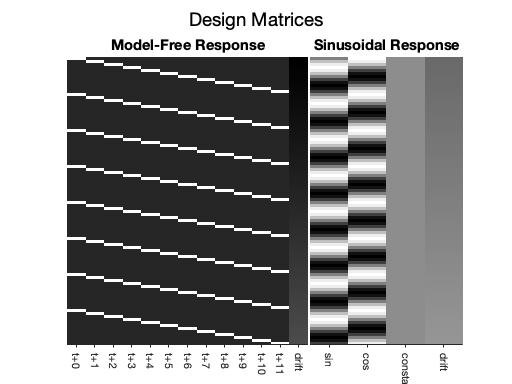

In [1]:
clear all
addpath(genpath(fullfile(pwd,'matlabFun')));
runFit

IN: anatomical V1 roi (C-derived\DecodingHR\anat\z)
IN: voxel visual field eccentricity (C-derived\DecodingHR\anat\z)
IN: sinusoidal fit results (C-derived\DecodingHR\fun\y)
F(IN)=OUT: masks the fit according to voxel eccentricity and activation level
Figures are additionally thresholded for activation level, but not the data that is saved!
OUT: sinusoidal fit results (C-derived\DecodingHR\fun\zSin)
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/maskSinAndHrFit/02jp.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/maskSinAndHrFit/02jp.fig


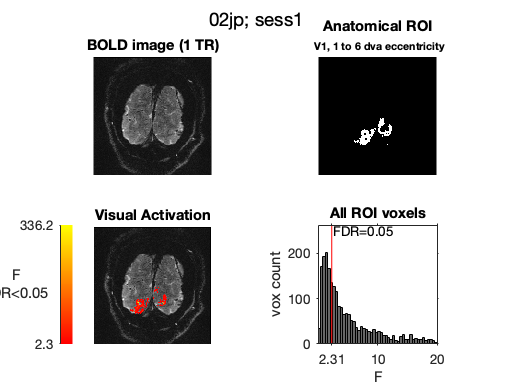

In [2]:
fitType = 'fixed'; % 'mixed' or 'fixed'
maskSinAndHrFit(fitType)

## Prediction 1: Competing stimuli will evoke a smaller and more delayed HR

### Compare responses evoked by different stimuli

IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived/DecodingHR/zSin)
threshVal=0.05
adjVoxDelay=0
F(IN)=OUT: threshold included voxels and analyse responses averaged across the ROI
OUT: figures and stats
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/sinusoidalGroupAnalysis/02jp.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/sinusoidalGroupAnalysis/02jp.fig
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/sinusoidalGroupAnalysis/group.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/sinusoidalGroupAnalysis/group.fig
***
delay diff=0.054s
***
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/sinusoidalGroupAnalysis/groupAmp.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/sinusoidalGroupAnalysis/groupAmp.fig
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/sinusoidalGroupAnalysis/groupDelay.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/sinusoidalGroupAnalysis/groupDe

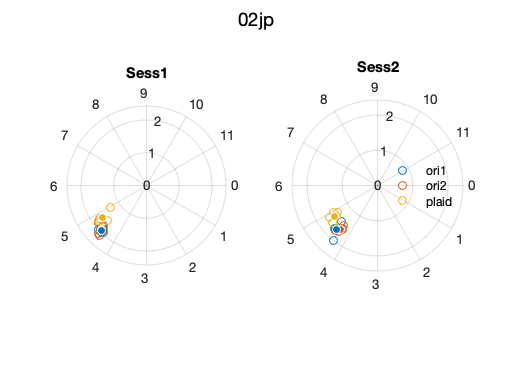

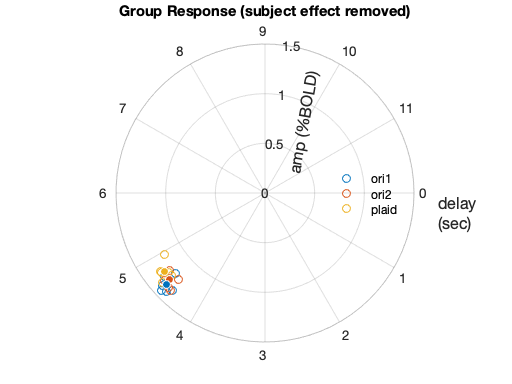

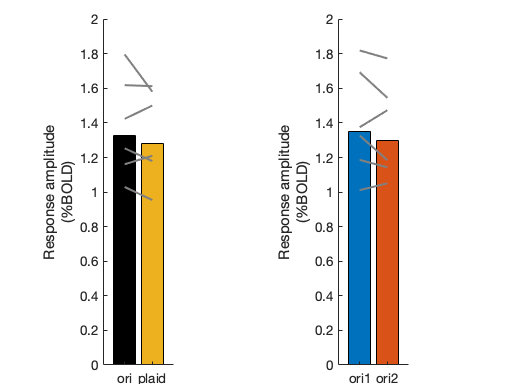

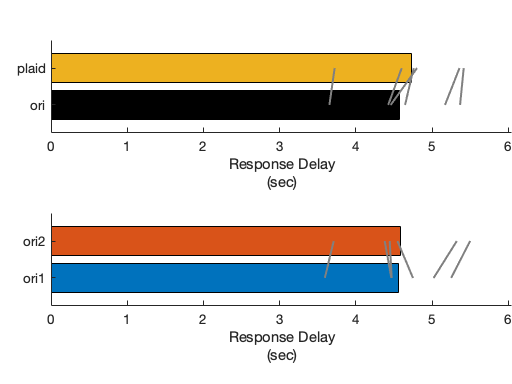

In [3]:
threshType = 'p'; %'p', 'fdr' or 'none'
sinusoidalGroupAnalysis(threshType)

### Visualize the sinusoidal response in V1

IN: BOLD hemodynamic responses (HR) from anatomical V1 ROI (C-derived/DecodingHR/zHr)
F(IN)->OUT: threshold included voxels and analyse HR averaged across the ROI
OUT: figures

ans =

    0.9290    0.6940    0.1250
    0.8500    0.3250    0.0980
         0    0.4470    0.7410



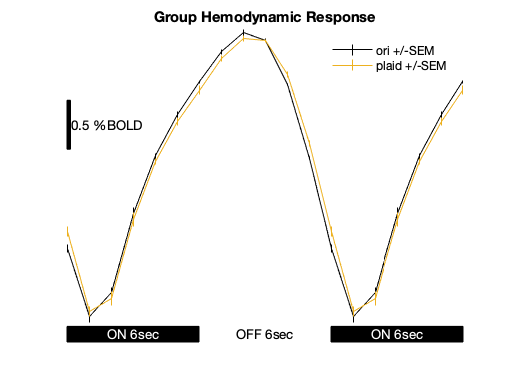

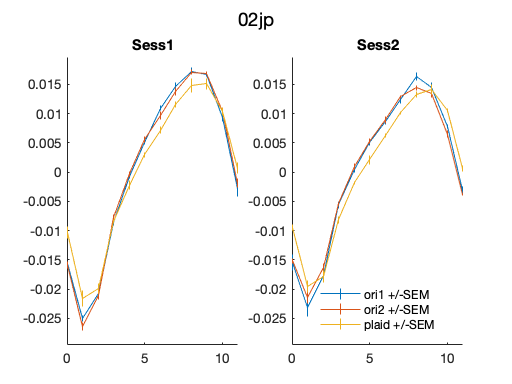

In [4]:
hrGroupAnalysis(threshType)

### Conclusion on Prediction 1

## Prediction 2: Stimulus orientation can be predicted not only from the multivoxel pattern of BOLD responses, but also from the pattern of BOLD delays

In [36]:
clear res
threshType = 'p';
switch threshType
    case 'none'
        featSelType = 'none'; % 'none', 'respF_p', 'respF_fdr', 'oriT_nVoxAsF' or 'oriT_p'
    case 'p'
        featSelType = 'respF_p';
    case 'fdr'
        featSelType = 'respF_fdr';
    otherwise
        error('X')
end

In [ ]:
svmSpace = 'polMag';
resTmp = runDecoding(svmSpace,featSelType);
disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.nObs,2),1)))])
disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.nDim,2),1)))])
res.(svmSpace) = resTmp;

In [ ]:
svmSpace = 'polDelay';
resTmp = runDecoding(svmSpace,featSelType);
disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.nObs,2),1)))])
disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.nDim,2),1)))])
res.(svmSpace) = resTmp;

In [ ]:
svmSpace = 'cartReal';
resTmp = runDecoding(svmSpace,featSelType);
disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.nObs,2),1)))])
disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.nDim,2),1)))])
res.(svmSpace) = resTmp;

In [39]:
fieldList = fields(res); clear accGroup pGroup
for fieldInd = 1:length(fieldList)
    accGroup(fieldInd) = sum(res.(fieldList{fieldInd}).acc(:).*res.(fieldList{fieldInd}).nObs(:)) / sum(res.(fieldList{fieldInd}).nObs(:))*100;
    pGroup(fieldInd) = binocdf(sum(res.(fieldList{fieldInd}).acc(:).*res.(fieldList{fieldInd}).nObs(:)),sum(res.(fieldList{fieldInd}).nObs(:)),0.5,'upper');
end
disp(fieldList')
disp(['       acc = ' num2str(accGroup,3)])
disp(['binomial p = ' num2str(pGroup,3)])

    {'pol'}    {'polMag'}    {'polDelay'}    {'cart'}    {'cartReal'}    {'cartImag'}

       acc = 52.8        59        50      60.4      59.7      54.9
binomial p = 0.227    0.0121     0.467   0.00477   0.00769     0.106


signedrank   = 10.00  16.50   5.00  20.00  20.00  12.00
signedrank p = 0.312  0.125  0.562  0.031  0.031  0.156
group accuracy  = 52.78%  59.03%  50.00%  60.42%  59.72%  54.86%
binomial   p    = 0.227   0.012   0.467   0.005   0.008   0.106
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/plotDecoding/acc.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/plotDecoding/acc.fig


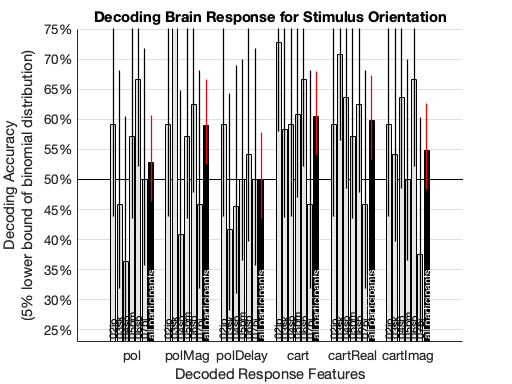

In [40]:
plotDecoding(res)

### Conclusion on Prediction 2